In [8]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# download the data here (no need login):
## https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

In [9]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

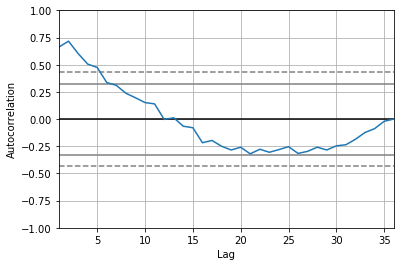

In [10]:
series = read_csv('shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

# First 10 ~ 12 lags are positive
# First 5 lags are higher than the dash line
# So, this is AR model, and the param for AR can start with 5

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sat, 16 Sep 2017   AIC                            406.340
Time:                                                 18:03:43   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

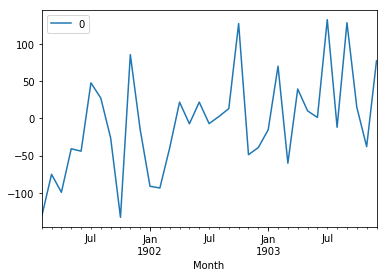

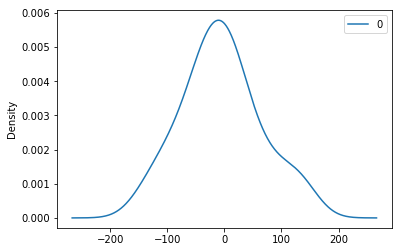

                0
count   35.000000
mean    -5.495234
std     68.132881
min   -133.296613
25%    -42.477967
50%     -7.186668
75%     24.748316
max    133.237956


In [23]:
# AR model with p=5, q=0 (not MA model), d=1 means using difference order as 1 to make the time series statinoary

series = read_csv('shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)  # with disp=0, we are turning off the debug info about fitting the linear regression
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [13]:
#  The first line plot if the plot of the residual errors, 
## suggesting that there may still be some trend information not captured by the model.

# The second plot, a density plot of the residual error values, 
## suggesting the errors are Gaussian, but may not be centered on zero.

# The last output is the distribution of the residual errors is displayed
## non-zero mean indicates that, there is bias in prediction

In [16]:
# forecast

series = read_csv('shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.values

array([ 266. ,  145.9,  183.1,  119.3,  180.3,  168.5,  231.8,  224.5,
        192.8,  122.9,  336.5,  185.9,  194.3,  149.5,  210.1,  273.3,
        191.4,  287. ,  226. ,  303.6,  289.9,  421.6,  264.5,  342.3,
        339.7,  440.4,  315.9,  439.3,  401.3,  437.4,  575.5,  407.6,
        682. ,  475.3,  581.3,  646.9])

predicted=387.376402, expected=440.400000
predicted=348.154152, expected=315.900000
predicted=386.308838, expected=439.300000
predicted=356.082001, expected=401.300000
predicted=446.379518, expected=437.400000
predicted=394.737272, expected=575.500000
predicted=434.915447, expected=407.600000
predicted=507.923421, expected=682.000000
predicted=435.482775, expected=475.300000
predicted=652.743812, expected=581.300000
predicted=546.343528, expected=646.900000
Test MSE: 8119.126


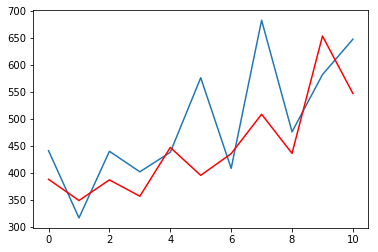

In [21]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y_pred = output[0]
    predictions.append(y_pred)
    obs = test[t]
    history.append(obs)  # The observation value in the last run will be put as the history for the next run
    print('predicted=%f, expected=%f' % (y_pred, obs))  # compare each prediction and observation
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot the forecast
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()